# CDF of $B^2$ is the same when sampled from $\mathcal{U}(0, 1)$ or $\mathcal{U}(-1, +1)$

In this notebook we empirically calculate the cumulative frequency distributions for $B^2$ for both cases:
1. $B \in \mathcal{U}(0, 1)$
2. $B \in \mathcal{U}(-1, +1)$

We plot the CDFs obtained and notice that they are similar. Finally, we plot the theoretical CDF and compare that with the two experimental plots.

## Setup

1. We import the necessary packages
2. We define some parameters that can be changed easily
3. The sampling functions are defined

In [1]:
from matplotlib import pyplot as plt

import math
import numpy as np
import pandas as pd
import random
import seaborn as sb

In [2]:
# This is used to set the size of the plots generated
plt.rcParams["figure.figsize"] = (7, 7)

In [3]:
# Change this value to increase or decrease the number of samples
samples = 20_000

In [4]:
# This determined the number of points sampled from the theoretical CDF for the line graph
points = 100

In [5]:
def get_sample_0_1():
    """
    Returns b^2 when b is sampled from (0, 1)
    """
    b = random.uniform(0, 1)
    return b * b

In [6]:
def get_sample_1_1():
    """
    Returns b^2 when b is sampled from (-1, +1)
    """
    b = random.uniform(-1, +1)
    return b * b

## Empirical CDF when $B \in \mathcal{U}(0, 1)$

`data1`, `series1` and `plot1` correspond to this case.

In [7]:
data1 = [get_sample_0_1() for _ in range(samples)]
series1 = pd.Series(data1, name="B²; B is i.i.d (0, 1)")

<AxesSubplot:xlabel='B²; B is i.i.d (0, 1)', ylabel='Probability'>

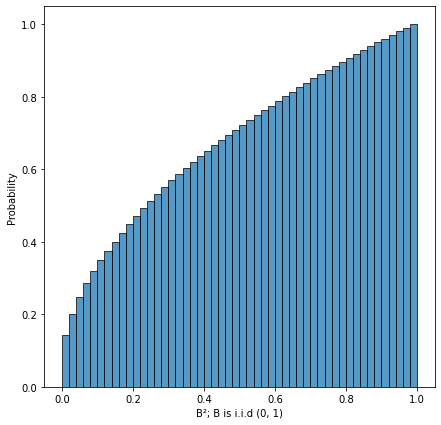

In [8]:
plot1 = sb.histplot(series1, cumulative=True, bins=50, stat="probability")
plot1

## Empirical CDF when $B \in \mathcal{U}(-1, +1)$

`data2`, `series2` and `plot2` correspond to this case.

In [9]:
data2 = [get_sample_1_1() for _ in range(samples)]
series2 = pd.Series(data2, name="B²; B is i.i.d (-1, +1)")

<AxesSubplot:xlabel='B²; B is i.i.d (-1, +1)', ylabel='Probability'>

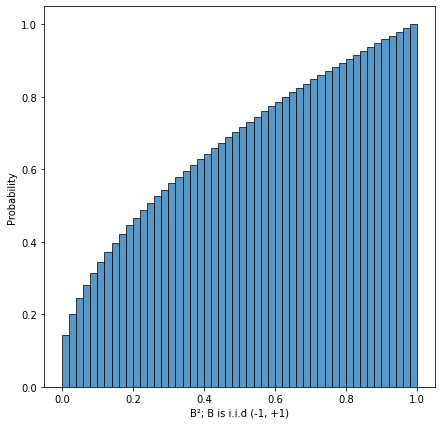

In [10]:
plot2 = sb.histplot(series2, cumulative=True, bins=50, stat="probability")
plot2

## Theoretical CDF plot

We define the CDF calculated in the theoretical discussion. Then we sample some point from it and plot it.

In [11]:
def cdf(x):
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return math.sqrt(x)
    else:
        return 1

In [12]:
x_points = np.arange(0, 1, 1.0 / points)

In [13]:
y_points = [cdf(x) for x in x_points]

<AxesSubplot:xlabel='B²', ylabel='Cumulative Probability Distribution Function - F(X)'>

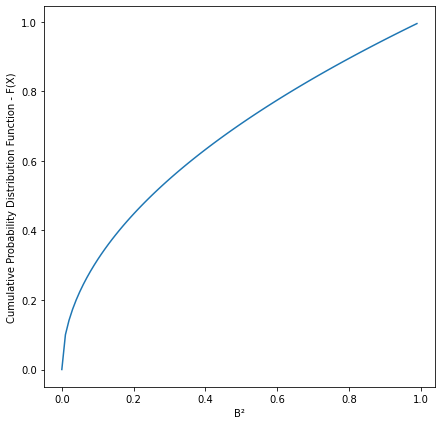

In [14]:
x_label = "B²"
y_label = "Cumulative Probability Distribution Function - F(X)"
pdf_data = pd.DataFrame(zip(x_points, y_points), columns=[x_label, y_label])
sb.lineplot(x=x_label, y=y_label, data=pdf_data)

## Summary

We notice that the empirical plots are identical and the theoretical graph matches both of them as well. Thus, the distribution of $B^2$ is the same regardless of whether it is sampled from $\mathcal{U}(0, 1)$ or $\mathcal{U}(-1, +1)$.